In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from sklearn import datasets
from sklearn.svm import  SVC
import numpy as np
from sklearn.metrics import accuracy_score

In [49]:
data = pd.read_csv("HorrorAfter.csv")
data.info()

data["Rating_class"] = np.where(data["Rating"] > 4.0, 'good', 'mid')
data.info()
# X = data[["Year"]]
# y = data["Rating_class"]

X = data.iloc[0:1001, 2:4]
y = data.loc[0:1000, 'Rating_class']


svm = SVC(kernel = 'rbf', random_state=1, gamma=0.08, C = 1)

svm.fit(X,y)

y_pred = svm.predict(X)
print("Accuracy score: " + str(accuracy_score(y, y_pred)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1196 non-null   object 
 1   Author  1196 non-null   object 
 2   Year    1196 non-null   int64  
 3   Rating  1196 non-null   float64
 4   Raters  1196 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 46.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1196 non-null   object 
 1   Author        1196 non-null   object 
 2   Year          1196 non-null   int64  
 3   Rating        1196 non-null   float64
 4   Raters        1196 non-null   int64  
 5   Rating_class  1196 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 56.2+ KB
Accuracy score: 0.942057942057942


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1196 non-null   object 
 1   Author        1196 non-null   object 
 2   Year          1196 non-null   int64  
 3   Rating        1196 non-null   float64
 4   Raters        1196 non-null   int64  
 5   Rating_class  1196 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 56.2+ KB


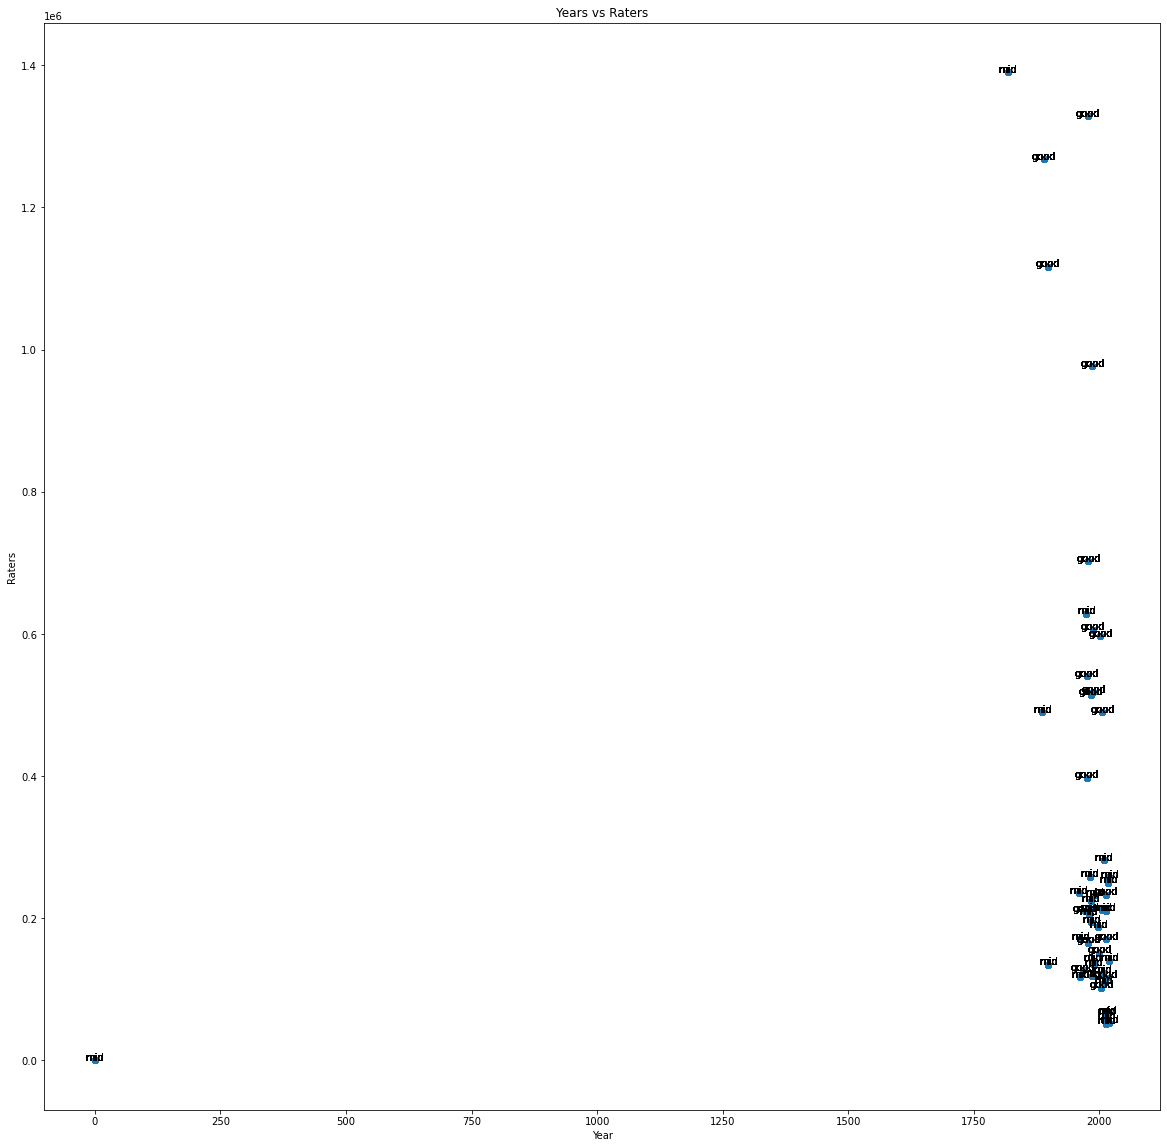

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


data.info()

# ddf.plot(kind= "scatter", x=)
fig, ax = plt.subplots(figsize=(20,20))

x = data["Year"].values
y = data["Raters"].values
z = data["Rating_class"].values

ax.scatter(x, y)
ax.set_xlabel('Year')
ax.set_ylabel('Raters')
ax.set_title('Years vs Raters')

for i, txt in enumerate(z):
    ax.annotate(txt, xy=(x[i], y[i]), xytext=(x[i], y[i]+0.5), ha='center')
plt.show()



# plt.scatter(data["Rating_class"] == "good", data["Rating_class"] == "good",
#             color='red', marker='o', label='malignant')
# plt.scatter(data["Rating_class"] == "bad", data["Rating_class"] == "bad",
#             color='green', marker='*', label='benign')

plt.show()


# X = data[['Title', 'Author', 'Year', 'Rating', 'Raters']]
# y = data['Year']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# classifier = SVC(kernel = "linear")
# classifier.fit(X_train, y_train)
# y_predict = classifier.predict(X_test)
# print(classification_report(y_test, y_predict))

# cm = confusion_matrix(y_test, y_predict)
# %matplotlib inline
# plt.figure(figsize=(10,7))
# sn.heatmap(cm, annot = True)
# plt.ylabel("Rating")
# plt.legend(loc = "upper left")
# plt.show()

In [28]:
data.to_csv("HorrorSVM.csv", index = False)